# Ismail Olumegbon

# Home Work #5

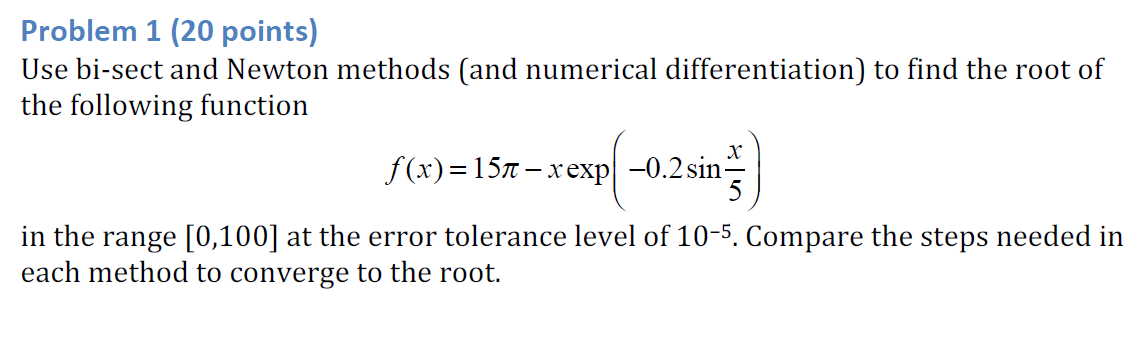

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

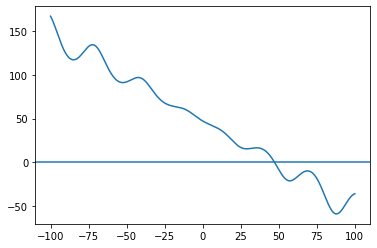

In [13]:
x = np.arange(-100.0,100.01,0.1)
y = 15.0*np.pi - x*np.exp(-0.2*np.sin(x/5))

plt.plot(x,y)
plt.axhline(0.0)

# Bi-sect Method

In [47]:
def f(x):
    return 15.0*np.pi - x*np.exp(-0.2*np.sin(x/5))

In [58]:
def bisection(f, x1,x2, tol=1e-5,nmax=30):
    xroot = []
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2>0:
        print('f(x1)*f(x2) should be negative')
        return 
    for i in range(nmax):
        xm = 0.5*(x1+x2)
        fm = f(xm)
        if fm*f1<0:
            x2 = xm
        else:
            x1 = xm
        xroot.append(x1)
        if abs(x1-x2) <= tol:
            print('tolerance reached in',i+1,'iterations')
            break
    if abs(x1-x2) > tol:
        print ('Max number of iterations reached before convergence')
    print ('numerical solution = ', x0)
    return x1, xroot

x0, xsol = bisection(f, 0, 100.0, tol=1e-5,nmax=30)

tolerance reached in 24 iterations
numerical solution =  47.12388515472412


In [59]:
print(xsol)

[0, 25.0, 37.5, 43.75, 46.875, 46.875, 46.875, 46.875, 47.0703125, 47.0703125, 47.119140625, 47.119140625, 47.119140625, 47.119140625, 47.1221923828125, 47.12371826171875, 47.12371826171875, 47.12371826171875, 47.12371826171875, 47.12381362915039, 47.12386131286621, 47.12388515472412, 47.12388515472412, 47.12388515472412]


# Newton Method

In [39]:
def f(x):
    return 15.0*np.pi - x*np.exp(-0.2*np.sin(x/5))

In [40]:
def fp(x, h=1E-5):
    
    return (f(x+h) - f(x-h)) / (2*h)

In [41]:
#Newton
def newton(f, fp, xs, tol=1e-5,nmax=30):   
    xroot2 = []
    g = f(xs)
    for i in np.arange(nmax):
        xroot2.append(xs)
        fprime = fp(xs)
        xs = xs - g/fprime
        g = f(xs)
        if abs(g) < tol: 
            print('tolerance reached in',i+1,'iterations')
            break
    if abs(g) > tol:
        print ('Max number of iterations reached before convergence')
    return xs, xroot2

In [42]:
print ('starting at x=1')
xzero, xsol2 = newton(f,fp,1)
print ('xzero,f(xzero) ',xzero,f(xzero))
print(xsol2)

starting at x=1
tolerance reached in 4 iterations
xzero,f(xzero)  47.123889843077194 -1.131776699025977e-07
[1, 50.993894694025634, 46.91926211903648, 47.12509695220123]


Text(0.5, 0, 'Number of iterations')

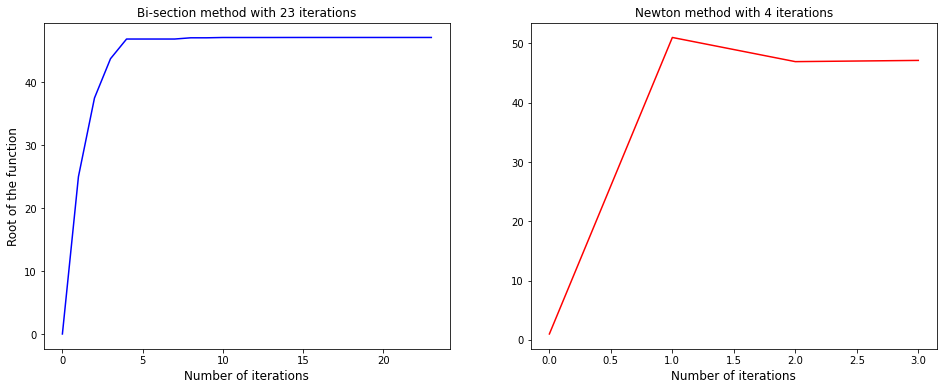

In [205]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(xsol, c ='b')
ax2.plot(xsol2, c = 'r')
ax1.set_title(r'Bi-section method with 23 iterations')
ax2.set_title(r'Newton method with 4 iterations')
ax1.set_ylabel('Root of the function',fontsize='large')
ax1.set_xlabel(r'Number of iterations' ,fontsize='large')
ax2.set_xlabel(r'Number of iterations' ,fontsize='large')

# Question #2

In [61]:
def f(alpha):
    L = 1.2
    R = 3
    ratio = R/alpha
    return alpha*np.cosh(L/alpha - np.arccosh(np.maximum(1, ratio))) - R

In [62]:
def fp(alpha, h=1E-5):
    
    return (f(alpha+h) - f(alpha-h)) / (2*h)

In [63]:
#Newton
def newton(f, fp, xs, tol=1e-5,nmax=30):   
    xroot2 = []
    g = f(xs)
    for i in np.arange(nmax):
        xroot2.append(xs)
        fprime = fp(xs)
        xs = xs - g/fprime
        g = f(xs)
        if abs(g) < tol: 
            print('tolerance reached in',i+1,'iterations')
            break
    if abs(g) > tol:
        print ('Max number of iterations reached before convergence')
    return xs, xroot2

In [64]:
print ('starting at x=1')
xzero, xsol2 = newton(f,fp,1)
print ('xzero,f(xzero) ',xzero,f(xzero))
print(xsol2)

starting at x=1
tolerance reached in 8 iterations
xzero,f(xzero)  2.9385344551081864 5.1803578662301675e-06
[1, 2.475634195231696, 3.084809974803161, 2.736262359786773, 2.9984405811225594, 2.982260002935963, 2.951826640992559, 2.9393392222691355]


In [262]:
def s(z):
    L = 1.2
    R = 3
    alpha = xzero
    ratio = R/alpha
    return alpha*np.cosh(z/alpha - np.arccosh(np.maximum(1, ratio)))

Text(0.5, 0, 'Z')

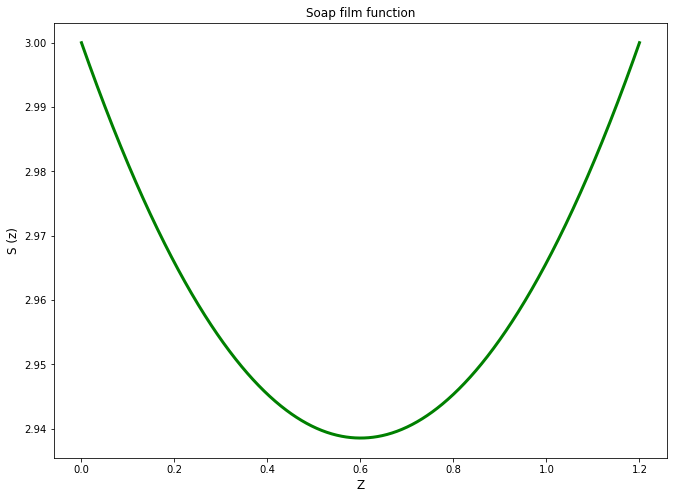

In [270]:
L = 1.2
z = np.linspace(0,L,1000)
fig, ax4 = plt.subplots(figsize=(11,8))
ax4.plot(z, s(z), lw =3, c = 'g')
ax4.set_title(r'Soap film function',fontsize='large')
ax4.set_ylabel('S (z)',fontsize='large')
ax4.set_xlabel(r'Z' ,fontsize='large')

# Question #3

In [99]:
def Monte_Carlo_Simulation(tau, Nin, w, SZA):
    Nref=0
    Nabs=0
    Ntra=0
    Ntot=Nin
    for photon_count in range(1,Nin + 1):
        s=-np.log(1.-(np.random.random()))* np.cos(np.deg2rad(SZA))
        if (0 < s < tau).any():
        #if 0 < s and s < tau:
            pos = s
            while (0 < pos < tau).any():
            #while 0 < pos and pos < tau:
                if np.random.random() <= w:
                    u=2*(np.random.random())-1
                    theta = np.rad2deg(np.arccos(u))
                    s_new=-np.log(1.-(np.random.random()))
                    pos+= s_new * np.cos(np.deg2rad(theta))
                else:
                    Nabs+=1
                    break
            else:
                if pos<0:
                    Nref+=1
                elif (pos > tau).any() :
                    Ntra+=1
        elif s < 0:
            Nref+=1
        elif s>tau:
            Ntra+=1
    return Nref/Ntot

In [100]:
def f(tau):
    Robs = 0.6
    Ref = Monte_Carlo_Simulation(tau, 1000, 1, 45) - Robs
    return Ref

Text(0.5, 0, '$\\tau$')

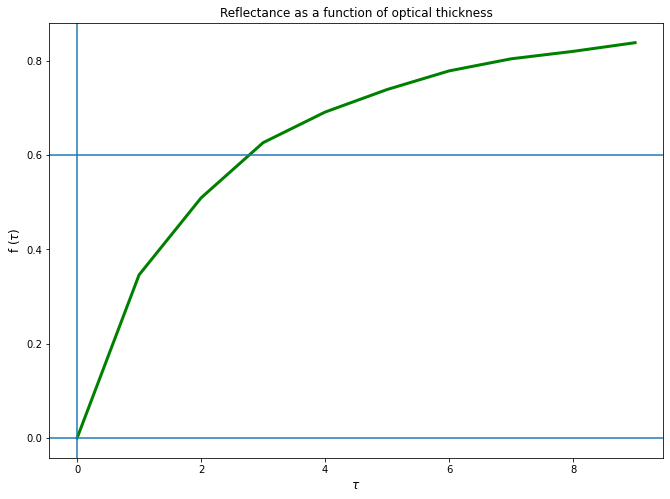

In [80]:
Ntau = np.arange(0, 10, 1)
Refplot = [Monte_Carlo_Simulation(k, 10000, 1, 0) for k in Ntau]
fig, ax4 = plt.subplots(figsize=(11,8))
ax4.plot(Ntau, Refplot , lw =3, c = 'g')
plt.axhline(0.0)
plt.axhline(0.6)
plt.axvline(0.0)
ax4.set_title(r'Reflectance as a function of optical thickness',fontsize='large')
ax4.set_ylabel(r'f ($\tau$)',fontsize='large')
ax4.set_xlabel(r'$\tau$' ,fontsize='large')

In [101]:
def fp(tau, h=1E-5):
    
    return (f(tau+h) - f(tau-h)) / (2*h)

In [103]:
#Newton
def newton(f, fp, xs, tol=1e-2,nmax=1000):   
    xroot2 = []
    g = f(xs)
    for i in np.arange(nmax):
        xroot2.append(xs)
        if xs < 0:
            xs = np.maximum(1, xs)
        g = f(xs)
        fprime = fp(xs)
        if fprime != 0:
            xs = xs - g/fprime
        else:
            xs = xs - g/0.0001

        if np.abs(g) < tol: 
            print('tolerance reached in',i+1,'iterations')
            break
    if np.abs(g) > tol:
        print ('Max number of iterations reached before convergence')
        
    return xs, xroot2

In [104]:
print ('starting at x=2.5')
xzero, xsol2 = newton(f,fp,2.5)
print ('xzero,f(xzero) ',xzero,f(xzero))
print(xsol2)

starting at x=2.5


KeyboardInterrupt: 